Text(0.5, 1.0, 'Archemedian spiral')

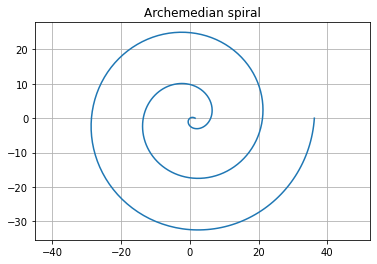

In [1]:
#Lecture 5.2: Examples of for loops, plots, and some cartopy.
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
#Example 5.2.1: Archimedean spiral
a = 1.5
b = -2.4
t = np.linspace(0,5*np.pi,500)
x = (a+b*t)*np.cos(t)
y = (a+b*t)*np.sin(t)
plt.plot(x,y)
#plt.plot([-40, 40], [0,0], color = 'grey')
plt.axis('equal') # makes the plot square, i.e. tick marks are equally spaced
# https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axis_equal_demo.html
plt.grid()
plt.title('Archemedian spiral')

Text(0.5, 1.0, 'Logarithmic spiral')

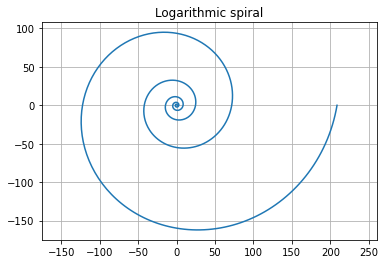

In [2]:
#Example 5.2.2: Logarithmic spiral
a = 1
k = 0.17
t = np.linspace(0,10*np.pi,1000)
x = a*np.exp(k*t)*np.cos(t)
y = a*np.exp(k*t)*np.sin(t)
plt.plot(x,y)
plt.axis('equal')
plt.grid()
plt.title('Logarithmic spiral')

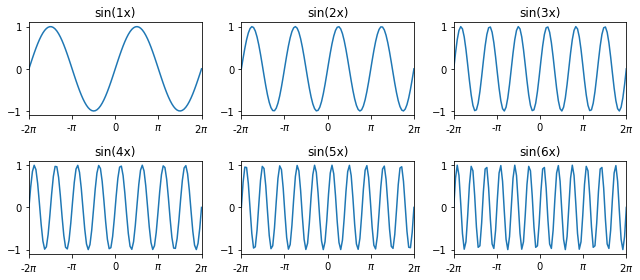

In [18]:
#Example 5.2.3: For-loop that changes the frequency of sin(x) and creates additional
#subplot for each iteration
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
x = np.linspace(-2*np.pi,2*np.pi,100) #creates x-values from -2PI to 2PI
fig = plt.figure(figsize=[9,4]) #creates figure object of width 9 x height 4
for i in range(1,7): #iterates from i (1 to 6)
    plt.subplot(2,3,i) #2 rows x 3 columns
    plt.plot(x,np.sin(x*i)) #sin(i*x) 
    plt.title('sin('+str(i)+'x)') #plots title
    plt.xticks([-2*np.pi,-1*np.pi,0,np.pi,2*np.pi],('-2$\pi$','-$\pi$','0','$\pi$','2$\pi$'))
    plt.xlim([-2*np.pi,2*np.pi]) #restricts x values to between -2PI and 2PI
    
#plt.legend(loc='best')
fig.tight_layout() # improves the layout of  the figures



In [3]:
#Example 5.2.4: Multi-panel plot showing the probability density function for different modes of
#atmospheric circulation across nuclear war scenarios.
import numpy as np
import scipy.stats
from scipy.stats import ks_2samp; 
import requests
import io
import matplotlib
import matplotlib.pyplot as plt

#get AO and NAO data from my website using my retrieve_npy function
def retrieve_npy(link): #requires import io and import numpy as np statements
    try:
        response = requests.get(link)
        response.raise_for_status()
        data = np.load(io.BytesIO(response.content),allow_pickle=True,encoding='latin1').item()
        return data
    except:
        print('Error getting data: '+link)
    
AOdata = retrieve_npy('http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_ao.npy')
NAOdata = retrieve_npy('http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_nao.npy')
PNAdata = retrieve_npy('http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_pna.npy')


Error getting data: http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_pna.npy


In [4]:
kde = {}; pval = {}; #create dictionaries for kernal density estimates and p-values 
t_range = np.linspace(-4,4,360) # PDF will be bounded by [-4,4] and there will be 360 increments (dx = 0.02228)
#cases to use for CESM-WACCM4, and set casenames for labels using 'loading' variable. 
cases = ['nw_ur_150_07', 'nw_targets_05', 'nw_targets_03', 'nw_targets_02', 'nw_targets_04', 'nw_targets_01x']
loading={}
loading['nw_ur_150_07'] = '150 Tg US-Russia'; 
loading['nw_targets_02'] = '27.3 Tg India-Pakistan'
loading['nw_targets_03'] = '37 Tg India-Pakistan'
loading['nw_targets_04'] = '16 Tg India-Pakistan'
loading['nw_targets_05'] = '46.8 Tg India-Pakistan'
loading['control'] = '0 Tg Control Ens 1'
loading['nw_targets_01x'] = '5 Tg India-Pakistan'

#
# Generate kernel density estimates, an estimate of the probability density function in a non-parametric way.
#

#panel 1: AO CESMLE
kde['AO CESMLE CLIMO'] = scipy.stats.gaussian_kde(np.array(AOdata['CESMLE CLIMO']),bw_method=None)
kde['AO CESMLE 1982/1991'] = scipy.stats.gaussian_kde(np.array(AOdata['CESMLE 1982/1991']),bw_method=None)
#uses Kolmogorov-Smirnov statistical test to determine if two PDFs are statistically distinct
pval['AO CESMLE 1982/1991'] = ks_2samp(kde['AO CESMLE 1982/1991'].pdf(t_range),kde['AO CESMLE CLIMO'].pdf(t_range)).pvalue

#panel 2: AO AMIP
kde['AO AMIP CLIMO'] = scipy.stats.gaussian_kde(np.array(AOdata['AMIP CLIMO']),bw_method=None)
kde['AO AMIP 1982/1991'] = scipy.stats.gaussian_kde(np.array(AOdata['AMIP 1982/1991']),bw_method=None)
pval['AO AMIP 1982/1991'] = ks_2samp(kde['AO AMIP 1982/1991'].pdf(t_range),kde['AO AMIP CLIMO'].pdf(t_range)).pvalue

#panel 3: AO nuclear war simulations
case = 'control'; kde['AO '+case] = scipy.stats.gaussian_kde(np.array(AOdata[case]),bw_method=None)
for case in cases:
  kde['AO '+case] = scipy.stats.gaussian_kde(np.array(AOdata[case]),bw_method=None)
  pval['AO '+case] = ks_2samp(kde['AO '+case].pdf(t_range),kde['AO control'].pdf(t_range)).pvalue


#panel 4: NAO CESMLE
kde['NAO CESMLE CLIMO'] = scipy.stats.gaussian_kde(np.array(NAOdata['CESMLE CLIMO']),bw_method=None)
kde['NAO CESMLE 1982/1991'] = scipy.stats.gaussian_kde(np.array(NAOdata['CESMLE 1982/1991']),bw_method=None)
pval['NAO CESMLE 1982/1991'] = ks_2samp(kde['NAO CESMLE 1982/1991'].pdf(t_range),kde['NAO CESMLE CLIMO'].pdf(t_range)).pvalue

#panel 5: NAO AMIP
kde['NAO AMIP CLIMO'] = scipy.stats.gaussian_kde(np.array(NAOdata['AMIP CLIMO']),bw_method=None)
kde['NAO AMIP 1982/1991'] = scipy.stats.gaussian_kde(np.array(NAOdata['AMIP 1982/1991']),bw_method=None)
pval['NAO AMIP 1982/1991'] = ks_2samp(kde['NAO AMIP 1982/1991'].pdf(t_range),kde['NAO AMIP CLIMO'].pdf(t_range)).pvalue

#panel 6: NAO nuclear
case = 'control'; kde['NAO '+case] = scipy.stats.gaussian_kde(np.array(NAOdata[case]),bw_method=None)
for case in cases:
  kde['NAO '+case] = scipy.stats.gaussian_kde(np.array(NAOdata[case]),bw_method=None)
  pval['NAO '+case] = ks_2samp(kde['NAO '+case].pdf(t_range),kde['NAO control'].pdf(t_range)).pvalue; print(case)


# Create strings of p-values to use for plot
for key in pval.keys():
  if pval[key] < 0.01:
    pval[key] = '<0.01'
  else:
    pval[key] = str(pval[key])[0:4]

nw_ur_150_07
nw_targets_05
nw_targets_03
nw_targets_02
nw_targets_04
nw_targets_01x


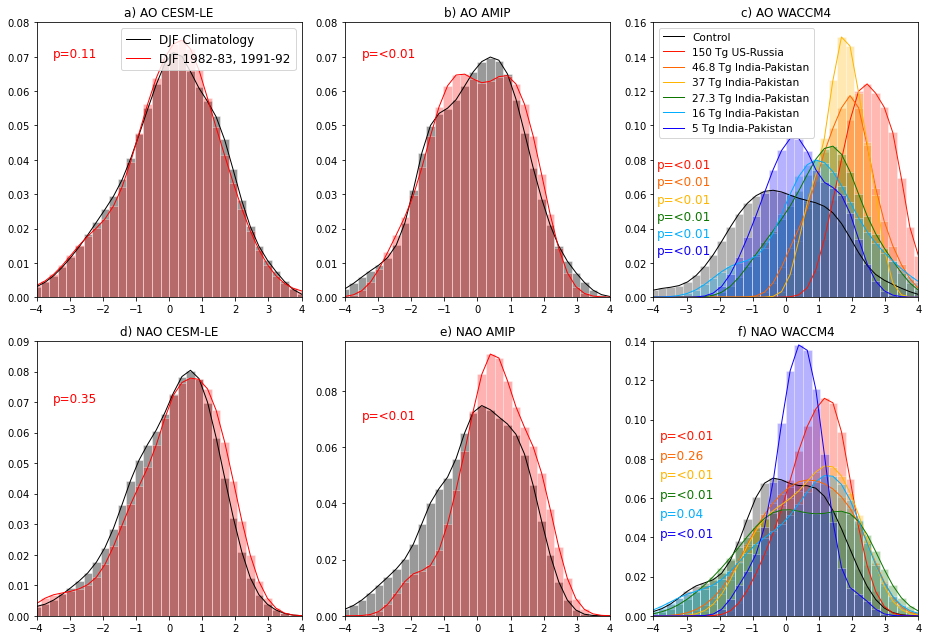

In [19]:
#
#Generate plot
#
bar_graph = True  #True to include bars, False to just plot the PDF lines.
#Setting a different t_range for plotting, so that the bars can actually be seen:
t_range = np.linspace(-4,4,32) # PDF will be bounded by [-4,4] and there will be 32 increments (dx = 0.02228)
dx = 1*abs(t_range[0])-abs(t_range[1])

plt.figure(figsize=[13,9]) #initialize figure 
nr = 2; nc = 3; f1=12   #nr = number of rows, nc = number of columns, f1 = default font size 
plt.subplot(nr,nc,1) #panel 1 CESMLE 
plt.title('a) AO CESM-LE')
CASE = 'AO CESMLE CLIMO'; label = 'DJF Climatology'; color = 'k'
normalize = np.nansum(kde[CASE].pdf(t_range))**-1  #normalization factor so PDF adds up to 1.0
plt.plot(t_range,kde[CASE].pdf(t_range)*normalize,color,lw=1,label=label) #plot probability density function over t_range 

CASE = 'AO CESMLE 1982/1991'; label = 'DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE].pdf(t_range))**-1 #normalization factor so PDF adds up to 1.0
plt.plot(t_range,kde[CASE].pdf(t_range)*normalize,color,lw=1,label=label) #plot probability density function over t_range 
plt.xlim([-4,4]); plt.ylim([0,0.08])  #x and y limits for plot
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)  #add text to the plot to indicate p-values
plt.legend(loc='best',fontsize=f1)  #plot legend
if bar_graph:   #add bars to graph
 CASE = 'AO CESMLE CLIMO'
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')  #plot bars that are black with white edge color
 CASE = 'AO CESMLE 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white') #plot bars that are red with white edge color 


plt.subplot(nr,nc,2) #panel 2 AMIP
plt.title('b) AO AMIP')
CASE = 'AO AMIP CLIMO'; label = 'AMIP Climatology DJF'; color = 'k'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
CASE = 'AO AMIP 1982/1991'; label = 'AMIP DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
plt.xlim([-4,4]); plt.ylim([0,0.08])
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)
if bar_graph:
 CASE = 'AO AMIP CLIMO';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')
 CASE = 'AO AMIP 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white')


#define colors for nuclear war simulations
color={}; color['nw_ur_150_07'] = '#FF1600'; color['nw_targets_05'] = '#FF6500'; color['nw_targets_03'] = '#FFB500'; 
color['nw_targets_02'] = '#FFF300'; color['nw_targets_02'] = '#0D7600'; color['nw_targets_04'] = '#0D7600'; 
color['nw_targets_04'] = '#00ADFF'; color['nw_targets_01x'] =   '#0F00FB'; color['nw_targets_01'] = '#0F00FB'; 
color['nw_cntrl_03'] = '#040404'; color['control'] = color['nw_cntrl_03']; 

plt.subplot(nr,nc,3) #panel 3 cesm-waccm4
plt.title('c) AO WACCM4',fontsize=f1)
CASE = 'AO control'; label = 'Control'; 
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,'k',lw=1,label=label); ITERATION = 0
plt.xlim([-4,4]); plt.ylim([0,0.16])
if bar_graph:
  bardata = kde[CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color='k',alpha=0.3,edgecolor='white')


for CASE in cases:
 label = loading[CASE]; 
 normalize = np.nansum(kde['AO '+CASE](t_range))**-1
 plt.plot(t_range,kde['AO '+CASE].pdf(t_range)*normalize,color[CASE],lw=1,label=label)
 plt.text(-3.9,0.075 - 0.01*ITERATION,'p='+str(pval['AO '+CASE])[:],color=color[CASE],fontsize=f1); ITERATION = ITERATION+1
 plt.legend(loc='best',fontsize=f1-1.5)
 if bar_graph:
  bardata = kde['AO '+CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color=color[CASE],alpha=0.3,edgecolor='white')




plt.subplot(nr,nc,4) #panel 4 CESMLE 
plt.title('d) NAO CESM-LE')
CASE = 'NAO CESMLE CLIMO'; label = 'CESM-LE Climatology DJF'; color = 'k'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
CASE = 'NAO CESMLE 1982/1991'; label = 'CESM-LE DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
plt.xlim([-4,4]); plt.ylim([0,0.09])
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)
if bar_graph:
 CASE = 'NAO CESMLE CLIMO'
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')
 CASE = 'NAO CESMLE 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white')


plt.subplot(nr,nc,5) #panel 5 AMIP
plt.title('e) NAO AMIP')
CASE = 'NAO AMIP CLIMO'; label = 'AMIP Climatology DJF'; color = 'k'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
CASE = 'NAO AMIP 1982/1991'; label = 'AMIP DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
plt.xlim([-4,4]); #plt.ylim([0,0.09])
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)
if bar_graph:
 CASE = 'NAO AMIP CLIMO';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')
 CASE = 'NAO AMIP 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white')



#define colors for nuclear war simulations
color={}; color['nw_ur_150_07'] = '#FF1600'; color['nw_targets_05'] = '#FF6500'; color['nw_targets_03'] = '#FFB500'; 
color['nw_targets_02'] = '#FFF300'; color['nw_targets_02'] = '#0D7600'; color['nw_targets_04'] = '#0D7600'; 
color['nw_targets_04'] = '#00ADFF'; color['nw_targets_01x'] =   '#0F00FB'; color['nw_targets_01'] = '#0F00FB'; 
color['nw_cntrl_03'] = '#040404'; color['control'] = color['nw_cntrl_03']; 

plt.subplot(nr,nc,6) #panel 6 cesm-waccm4
plt.title('f) NAO WACCM4')
CASE = 'NAO control'; label = 'CESM-WACCM4 Climatology DJF'; 
normalize = np.nansum(kde[CASE](t_range))**-1
plt.xlim([-4,4]); plt.ylim([0,0.14])
plt.plot(t_range,kde[CASE](t_range)*normalize,'k',lw=1,label=label); ITERATION = 0
if bar_graph:
  bardata = kde[CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color='k',alpha=0.3,edgecolor='white')


for CASE in cases:
 label = loading[CASE]; 
 normalize = np.nansum(kde['NAO '+CASE](t_range))**-1
 plt.plot(t_range,kde['NAO '+CASE](t_range)*normalize,color[CASE],lw=1,label=label)
 plt.text(-3.8,0.09 - 0.01*ITERATION,'p='+str(pval['NAO '+CASE])[:],color=color[CASE],fontsize=f1); ITERATION = ITERATION+1
 if bar_graph:
  bardata = kde['NAO '+CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color=color[CASE],alpha=0.3,edgecolor='white')



plt.tight_layout()

In [9]:
#Example 5.2.3: using cartopy to draw a map
import cartopy
import cartopy.crs as ccrs
import os
import glob as glob
import xarray as xr
import netCDF4 as nc4
from collections import OrderedDict
%matplotlib inline   
import matplotlib.pyplot as plt

#Step 1: get data - #connect to UCAR supercomputer (don't run this)
if len(sorted(glob.glob('scratch/*'))) <2:
    os.system('sshfs jcoupe@data-access.ucar.edu:/glade/scratch/jcoupe/archive/ scratch')
else:
    print('Already connected to server.')

Already connected to server.


In [6]:
#Step 2: get files
start_yr = 6
num_years = 5
endyr=start_yr + num_years 
case = 'Test10-DATM'
folder = 'coeus_web/KPg/MARBL_diagnostics/'+case+'/'
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
        mo2="{:02d}".format(month)
        files.extend(sorted(glob.glob('scratch/'+case+'/ocn/hist/'+case+'.pop.h.'+yr4+'-'+mo2+'.nc')))

doing simulation year 6 !
doing simulation year 7 !
doing simulation year 8 !
doing simulation year 9 !
doing simulation year 10 !


In [20]:
files

{'Test10-CAM4': ['scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-01.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-02.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-03.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-04.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-05.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-06.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-07.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-08.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-09.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-10.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-11.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0006-12.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0007-01.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0007-02.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.0007-03.nc',
  'scratch/Test10-CAM4/ocn/hist/Test10-C

In [7]:
#Step 3: use xarray to open files and extract variables
cesm_mon_ds=xr.open_mfdataset(files,decode_times=False,decode_coords=False, concat_dim='time')
print('Opened dataset.')
variables = ['sp_Fe_lim_surf','sp_P_lim_surf','sp_N_lim_surf',
             'diat_Fe_lim_surf', 'diat_P_lim_surf','diat_N_lim_surf','diat_SiO3_lim_surf','diaz_P_lim_surf',
             'diaz_Fe_lim_surf','photoC_TOT_zint','photoC_sp_zint','photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint',
             'cocco_Fe_lim_surf','cocco_C_lim_surf','cocco_N_lim_surf','cocco_P_lim_surf',
             'CaCO3_PROD_zint','SiO2_PROD','POC_FLUX_100m','coccoCaCO3','diatC', 'coccoC','spC','diazC','ALK','SALT'] 
coords = {'x':'TLONG','y':'TLAT'}
keepthese=['z_t','z_t_150m','time_bound','TAREA','PO4','Fe','NO3','SiO3','ALK','REGION_MASK'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']
cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
print('Extracted variables.')
cesm_ann_ds=cesm_mon_ds.mean(dim='time')
print('Averaged over time dimension.')
print('Done.')


Opened dataset.
Extracted variables.
Averaged over time dimension.
Done.


In [10]:
#Step 4: #get world ocean atlas data for validation
filewo = 'scratch/WOA2018_x3POPgrid.nc'
ds_woa = xr.open_dataset(filewo, decode_times=False, decode_coords=False)
print('Opened World Ocean Atlas file.')
ds_woa['z_t'] = cesm_ann_ds.z_t
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
depths=ds_woa.z_t * 0.01
print('Finished.')


Opened World Ocean Atlas file.
Finished.


In [11]:
#Step 5: calculate difference between model and obs
NO3_diff = cesm_ann_ds.NO3 - ds_woa.NO3
PO4_diff = cesm_ann_ds.PO4 - ds_woa.PO4
SiO3_diff = cesm_ann_ds.SiO3 - ds_woa.SiO3
print('Finished model - obs calculations.')

Finished model - obs calculations.


/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which 

Finished NO3 panels.


/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which 

Finished PO4 panels.


/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which 

Finished SiO3 panels.


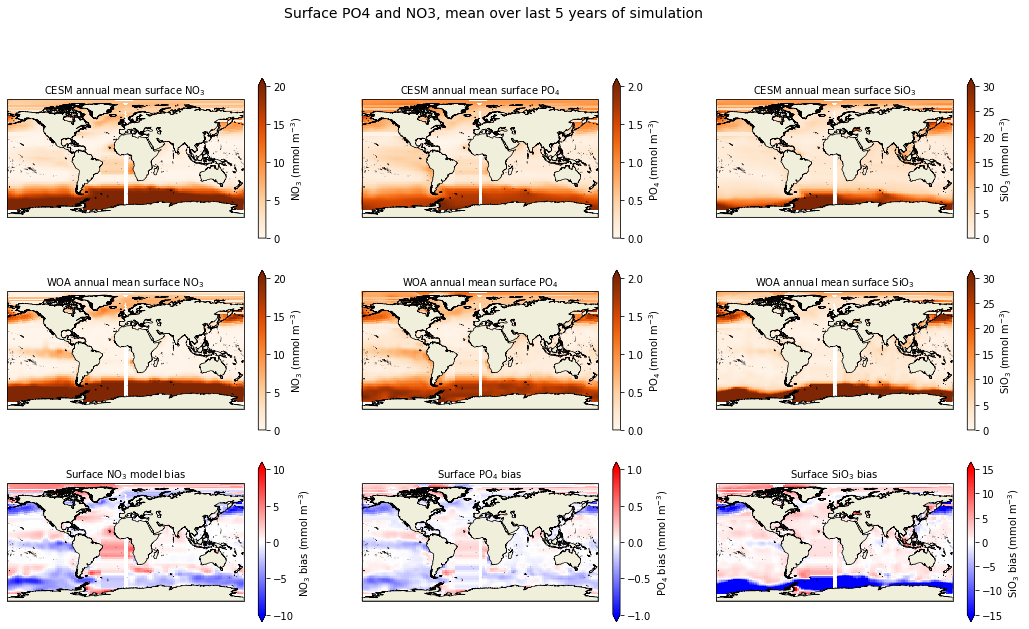

In [12]:
#Step 6: create plots
fig = plt.figure(figsize=(18,10))
plt.suptitle('Surface PO4 and NO3, mean over last 5 years of simulation', fontsize=14)
land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k',linewidth=0.5,
                                        facecolor=cartopy.feature.COLORS['land'])
####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(3,3,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface NO$_3$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.NO3.isel(z_t=0), vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,4, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface NO$_3$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.NO3.isel(z_t=0), vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,7, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface NO$_3$ model bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 NO3_diff.isel(z_t=0), vmin=-10, vmax=10, cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='NO$_3$ bias (mmol m$^{-3}$)')
print('Finished NO3 panels.')

####################PO4
#---- CESM panel
ax = fig.add_subplot(3,3,2, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface PO$_4$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.PO4.isel(z_t=0), vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,5, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface PO$_4$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.PO4.isel(z_t=0), vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,8, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface PO$_4$ bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 PO4_diff.isel(z_t=0), vmin=-1, vmax=1, cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='PO$_4$ bias (mmol m$^{-3}$)')
print('Finished PO4 panels.')


####################SiO3
#---- CESM panel
ax = fig.add_subplot(3,3,3, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface SiO$_3$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.SiO3.isel(z_t=0), 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,6, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface SiO$_3$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.SiO3.isel(z_t=0), 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,9, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface SiO$_3$ bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 SiO3_diff.isel(z_t=0), 
                  vmin=-15, vmax=15, 
                  cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='SiO$_3$ bias (mmol m$^{-3}$)')
print('Finished SiO3 panels.')

In [13]:
#Validate salinity data
start_yr = 6
num_years = 5
endyr=start_yr + num_years 
files = {}
for case in ['Test10-CAM4','Test10-DATM']:
 folder = 'coeus_web/KPg/MARBL_diagnostics/'+case+'/'
 files[case] = []
 for year in range(start_yr,endyr):
     yr4="{:04d}".format(year)
     print('doing simulation year', year, '!')
     for month in range(1, 13):
         mo2="{:02d}".format(month)
         files[case].extend(sorted(glob.glob('scratch/'+case+'/ocn/hist/'+case+'.pop.h.'+yr4+'-'+mo2+'.nc')))

doing simulation year 6 !
doing simulation year 7 !
doing simulation year 8 !
doing simulation year 9 !
doing simulation year 10 !
doing simulation year 6 !
doing simulation year 7 !
doing simulation year 8 !
doing simulation year 9 !
doing simulation year 10 !


In [14]:
cesm_ann_ds={}
for case in ['Test10-CAM4','Test10-DATM']:
 cesm_mon_ds=xr.open_mfdataset(files[case],decode_times=False,decode_coords=False, concat_dim='time')
 variables = ['ALK','DIC','SALT'] 
 coords = {'x':'TLONG','y':'TLAT'}
 keepthese=['z_t','z_t_150m','time_bound','TAREA','DIC','ALK','SALT','REGION_MASK'] + variables
 keep_vars = keepthese +list(coords.values())+['dz','KMT']
 cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
 cesm_ann_ds[case] =cesm_mon_ds.mean(dim='time'); print(case + ' completed')


#get world ocean atlas data 
filewo = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2018_x3POPgrid.nc'
filewo = 'scratch/WOA2018_x3POPgrid.nc'
ds_woa = xr.open_dataset(filewo, decode_times=False, decode_coords=False)
ds_woa['z_t'] = cesm_ann_ds[case].z_t
#ALK = cesm_ann_ds[case].ALK
#DIC = cesm_ann_ds[case].DIC
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
depths=ds_woa.z_t * 0.01


Test10-CAM4 completed
Test10-DATM completed


<xarray.DataArray 'z_t' ()>
array(1500., dtype=float32)
Coordinates:
    z_t      float32 1.5e+03
Attributes:
    long_name:  depth from surface to midpoint of layer
    units:      centimeters
    positive:   down
    valid_min:  500.0
    valid_max:  537500.0

In [15]:
DATA1 = cesm_ann_ds['Test10-CAM4'].SALT.isel(z_t=0)
DATA2 = cesm_ann_ds['Test10-DATM'].SALT.isel(z_t=0)
DATA3 = ds_woa.SALT.isel(z_t=0)

In [48]:
#fill in continents using this cartopy feature:
land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k',linewidth=0.5,
                                        facecolor=cartopy.feature.COLORS['land'])

/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which 

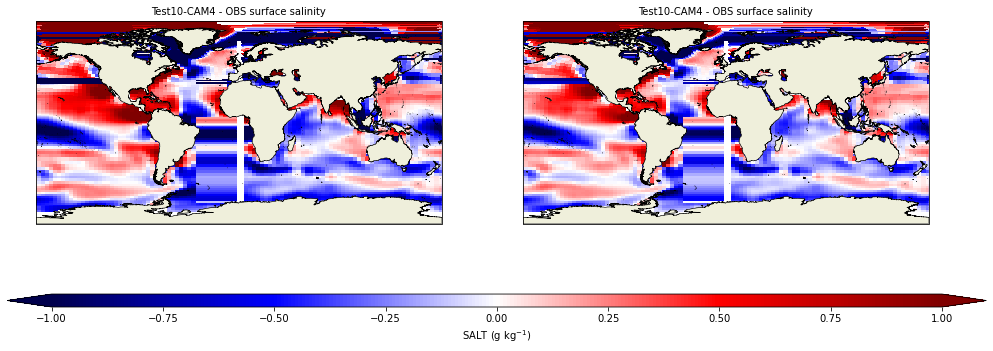

In [49]:
fig = plt.figure(figsize=(16,6)) 

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Test10-CAM4 - OBS surface salinity', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 DATA1-DATA3, vmin=-1, vmax=1, cmap='seismic',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Test10-CAM4 - OBS surface salinity', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 DATA2-DATA3, vmin=-1, vmax=1, cmap='seismic',
                 transform=ccrs.PlateCarree())
ax.add_feature(land_object)


position = fig.add_axes([0.10,0.075,0.85,0.03])
cbar1 = fig.colorbar(pc2,cax = position,extend='both',orientation='horizontal',label='SALT (g kg$^{-1}$)'); 
#fig.tight_layout()

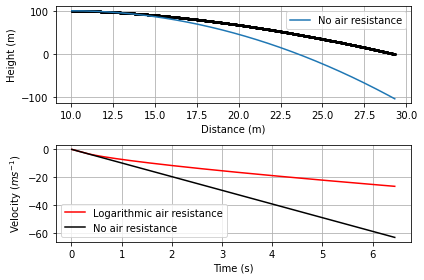

In [16]:
#Example 5.2.5: Numerically solve for the time it takes for a projectile to hit the ground
# with logarithmic air resistance
def fall_speed_dV(dt,vel=0,air_resistance=False): #returns velocity in meters per second
    dvel = -9.8*dt    #change in velocity = acceleration*time
    if air_resistance:
        if abs(vel)<3:
            nu_grav = -9.8
        else:
            nu_grav = -9.8*(np.log(abs(vel))**-1)
        if nu_grav<-9.8:
            nu_grav=-9.8
        dvel = (nu_grav*dt)
    return dvel

data = {} #use a dictionary to store information
keys = ['vel_y','dist_y','dist_x','time']
for key in keys:
    data[key]=[]
    
    
dist_y= 100 #meters, initial distance above the ground
dist_x = 10 #meters
vel_y_i = 0 #meters per second, initial y velocity
vel_x_i = 3 #meters per second, initial x velocity
dt = 0.01 #seconds, timestep to iterate
g = -9.8 #m/s2
timesteps = 1;

plt.figure(); plt.subplot(2,1,1)
vel_y = vel_y_i; dist_y_i = dist_y
while dist_y > 0: #iterate through time until we reach the ground
    tot_time = dt*timesteps
    vel_y = vel_y + fall_speed_dV(dt,vel=vel_y,air_resistance=True) #get velocity at end of timestep
    dy = dt*vel_y #y distance traveled
    dx = dt*vel_x_i #x distance traveled
    dist_x = dist_x+dx
    dist_y = dist_y+dy
    timesteps = timesteps+1; 
    plt.plot(dist_x,dist_y,'o',color='k',markersize=2)
    data['vel_y'].append(vel_y)
    data['dist_y'].append(dist_y)
    data['dist_x'].append(dist_x)
    data['time'].append(tot_time)
    
                          
plt.ylabel('Height (m)'); plt.xlabel('Distance (m)')
vel_noar=dist_y_i+(vel_y_i*np.array(data['time'])) + (0.5*-9.8*(np.array(data['time'])**2))
plt.plot(data['dist_x'],vel_noar,label='No air resistance') 
plt.legend(loc='best'); plt.grid(); 
plt.subplot(2,1,2)
plt.plot(data['time'],data['vel_y'],'r',label='Logarithmic air resistance'); 
plt.ylabel('Velocity ($m s^{-1}$)'); plt.xlabel('Time (s)')
vel = -9.8*np.array(data['time'])
plt.plot(data['time'],vel,'k',label='No air resistance') #no air resistance
#plt.plot(data['time'],vel-data['vel_y'],'b') 
plt.ylabel('Velocity ($m s^{-1}$)'); plt.xlabel('Time (s)'); plt.legend(loc='best')
plt.grid(); plt.tight_layout()

In [ ]:
#############
#
# EOF
#
#############
data=0

In [27]:
tot_time

16.61

In [ ]:
#W.1 Do Exercise 3 in practice python https://www.practicepython.org
#and write a program that prints out all the elements of the list 
#that are less than 5.
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
for i in range(len(a)):
    if a[i] <5:
        print(a[i],' at index ',i)

In [8]:
#Make a new list that has all the elements less than 5 in it
#create a mask
import numpy as np
a = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])
mask = (a < 5) #create a mask
extract_from_a = a[mask] # or,  a[a%3==0]
print(extract_from_a)   

[1 1 2 3]


In [9]:
#one line solution
print([aa for aa in a if aa < 5])

[1, 1, 2, 3]


In [13]:
#Ask the user for a number and return a list that contains only 
#elements from the original list a that are smaller than that
# number given by 
#the user.
usr_input = int(input('Enter a number')) 
a = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])
print([aa for aa in a if aa <usr_input])

Enter a number34
[1, 1, 2, 3, 5, 8, 13, 21]


In [24]:
#E.1 Complete intermediate python chapter 4: Loops
#Exercises 4-7 practice python
#Exercise 4: Create a program that asks the user for a number 
#and then prints out a list of all the divisors of that number.
usr_input = 50 # = int(input('Enter a number'))
numbers = np.arange(1,usr_input+1,1); 
list_of_divisors=[]
for i in numbers:
    if usr_input%i ==0: #then it is a divisor
        list_of_divisors.append(i)
print(list_of_divisors)

[1, 2, 5, 10, 25, 50]


In [27]:
#Exercise 5: Take two lists and write a program that returns a list that contains only elements
#common between the lists (without duplicates). Make sure it works on two lists of diff sizes.
a=[1,1,2,3,5,8,13,21,34,55,89]
b=[1,2,3,4,5,6,7,8,9,10,11,12,13]
like_list=[]
if len(a) < len(b):#find which list is longer
    long_list = a; short_list = b
else:
    long_list=b; short_list=a
    
for i in range(len(long_list)): #go through all of long_list
    if long_list[i] in short_list: #if long_list[i] is in short_list
        if long_list[i] not in like_list: #remove duplicates
            like_list.append(long_list[i])
        
print(like_list)

[1, 2, 3, 5, 8, 13]


In [34]:
#Exercise 6: Ask user for a string and print out whether the string is a palindrome or not
usr_input = 'racecar' #str(input('Enter a string:'))
if usr_input == usr_input[::-1]:
    print(usr_input + ' is a palindrome')
else:
    print(usr_input + ' is not a palindrome')

yeeteey is a palindrome


In [37]:
#Exercise 7: write one line of python that takes the list a and makes a new list
#that has only the even elements of this list in it
a=np.array([1,4,9,16,25,36,49,64,81,100])
print([aa for aa in a if aa%2==0])

[4, 16, 36, 64, 100]
